**Function and modules for data preparation and visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib
import sklearn

import warnings
warnings.filterwarnings('ignore')
import re
import os

**Function and modules for the supervised Classification models**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

**Function and modules for data analysis and model evaluation**

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

In [4]:
X=pd.read_csv('alon_inputs.csv',header=None)

lab_col=['output']
y=pd.read_csv('alon_outputs.csv',header=None,names=lab_col)

In [5]:
y=y.replace({'normal':0 , 'tumoral':1 })
y

,output
0,1
1,0
2,1
3,0
4,1
...,...
57,1
58,1
59,0
60,1


**Read inputs & outputs (Data)**

# work with features as full data & classes or target for it's output

In [6]:
kfold=KFold(n_splits=10, random_state=42, shuffle=True)

# GridSearch Implementation 

## Knn

In [7]:
kn_classifier = KNeighborsClassifier()

In [8]:
param_grid_kn = {   
    'n_neighbors':[1,3,5,7,9,11,13,15],
    'weights':['uniform','distance'],
    'leaf_size':[10,30,],
}

In [9]:
kn_tuned =GridSearchCV(kn_classifier,param_grid=param_grid_kn, cv=kfold, verbose=2, n_jobs=4,scoring ="accuracy")

In [10]:
kn_tuned.fit(X, y.values.ravel())

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'leaf_size': [10, 30],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [11]:
print(kn_tuned.best_score_)
print(kn_tuned.best_params_)

0.8571428571428571
{'leaf_size': 10, 'n_neighbors': 3, 'weights': 'uniform'}


## SVC

In [12]:
svc_classifier = SVC()

In [13]:
param_grid_svm = {
    'C': [1,5,10,15,20,.1,30],
    'gamma': [ 'scale','auto'],
    'kernel': ['rbf','linear'],
}

In [14]:
svc_tuned =GridSearchCV(svc_classifier,param_grid=param_grid_svm,verbose=2, n_jobs=4,cv=5,scoring ="accuracy"  )

In [15]:
svc_tuned.fit(X,  y.values.ravel())

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 5, 10, 15, 20, 0.1, 30],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [16]:
print(svc_tuned.best_score_)
print(svc_tuned.best_params_)

0.9012820512820514
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


# RF

In [17]:
rf_classifier = RandomForestClassifier()

In [18]:
param_grid_rf = {
    'n_estimators': [20,40,60,80,100,],
    'max_depth':[1,3,5,None],
    'criterion':['gini','entropy',],
    'max_features':['sqrt','log2',],
    'random_state':[42],
}

In [19]:
rf_tuned = GridSearchCV(
    rf_classifier, param_grid=param_grid_rf, cv=kfold, verbose=2, n_jobs=4,scoring ="accuracy" )

In [20]:
rf_tuned.fit(X,  y.values.ravel())

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [42]},
             scoring='accuracy', verbose=2)

In [21]:
print(rf_tuned.best_score_)
print(rf_tuned.best_params_)

0.8380952380952381
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}


**Train Test Split :**

**we trained the features split percentages (Train: 65%, Test: 35%)**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.32, random_state=342,)

## KNN

In [24]:
knn=KNeighborsClassifier()

In [25]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [26]:
knn.score(X_train, Y_train) #Train Score

0.8571428571428571

In [27]:
KNNaccuracy=knn.score(X_test, Y_test) #Test Score
KNNaccuracy

0.95

In [28]:
from sklearn.metrics import classification_report
y_pred=knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        15

    accuracy                           0.95        20
   macro avg       0.97      0.90      0.93        20
weighted avg       0.95      0.95      0.95        20



## svm

In [29]:
svc =SVC()

In [30]:
svc.fit(X_train,Y_train)

SVC()

In [31]:
svc.score(X_train, Y_train) #Train Score

0.8571428571428571

In [32]:
SVCaccuracy=svc.score(X_test, Y_test) #Test Score
SVCaccuracy

0.9

In [33]:
from sklearn.metrics import classification_report
y_pred=svc.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.88      1.00      0.94        15

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



## RF

In [34]:
rf =RandomForestClassifier()

In [35]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [36]:
rf.score(X_train, Y_train) #Train Score

1.0

In [37]:
RFaccuracy=rf.score(X_test, Y_test) #Test Score
RFaccuracy

0.85

In [38]:
from sklearn.metrics import classification_report
y_pred=rf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.93      0.87      0.90        15

    accuracy                           0.85        20
   macro avg       0.80      0.83      0.81        20
weighted avg       0.86      0.85      0.85        20



### Before Feature Selection and Parameters Tuning

[(0.0, 100.0)]

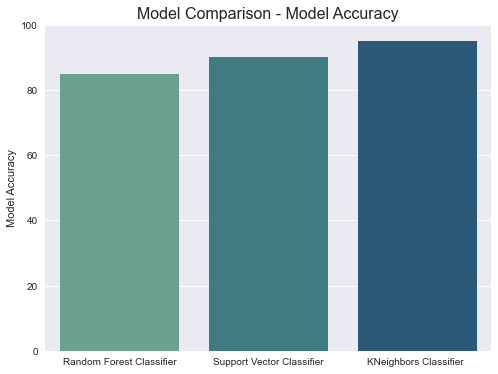

In [39]:
plt.style.use("seaborn")

xl1 = ["Random Forest Classifier",  
     "Support Vector Classifier","KNeighbors Classifier "]

yv1 = [RFaccuracy*100, 
     SVCaccuracy*100,
     KNNaccuracy*100,]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=xl1,y=yv1, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))

# Feature selection Code :

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select=SelectKBest(chi2, k=200)
X_train_selected = select.fit_transform(X_train, Y_train)
X_test_selected= select.transform(X_test)

# Evalutaed models

### Random Forest

In [68]:
rf_evalutaed =RandomForestClassifier(**rf_tuned.best_params_)

In [69]:
rf_evalutaed.fit(X_train_selected,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       random_state=42)

In [70]:
rf_evalutaed.score(X_train_selected, Y_train) #Train Score

1.0

In [71]:
RFTaccuracy=rf_evalutaed.score(X_test_selected, Y_test) #Test Score
RFTaccuracy

0.95

In [72]:
from sklearn.metrics import classification_report
y_pred=rf_evalutaed.predict(X_test_selected)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
weighted avg       0.96      0.95      0.95        20



### SVC

In [73]:
svc_evalutaed =SVC(**svc_tuned.best_params_)

In [74]:
svc_evalutaed.fit(X_train_selected,Y_train)

SVC(C=10)

In [75]:
svc_evalutaed.score(X_train_selected, Y_train) #Train Score

0.9761904761904762

In [76]:
SVCTaccuracy=svc_evalutaed.score(X_test_selected, Y_test) #Test Score
SVCTaccuracy

0.85

In [77]:
from sklearn.metrics import classification_report
y_pred=svc_evalutaed.predict(X_test_selected)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 5  0]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.80      0.89        15

    accuracy                           0.85        20
   macro avg       0.81      0.90      0.83        20
weighted avg       0.91      0.85      0.86        20



### KNeighbors

In [78]:
knn_evalutae=KNeighborsClassifier(**kn_tuned.best_params_)

In [79]:
knn_evalutae.fit(X_train_selected,Y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=3)

In [80]:
knn_evalutae.score(X_train_selected, Y_train) #Train Score

0.8571428571428571

In [81]:
KNNTaccuracy=knn_evalutae.score(X_test_selected, Y_test) #Test Score
KNNTaccuracy

0.85

In [82]:
from sklearn.metrics import classification_report
y_pred=knn_evalutae.predict(X_test_selected)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.93      0.87      0.90        15

    accuracy                           0.85        20
   macro avg       0.80      0.83      0.81        20
weighted avg       0.86      0.85      0.85        20



## After Feature Selection

[(0.0, 100.0)]

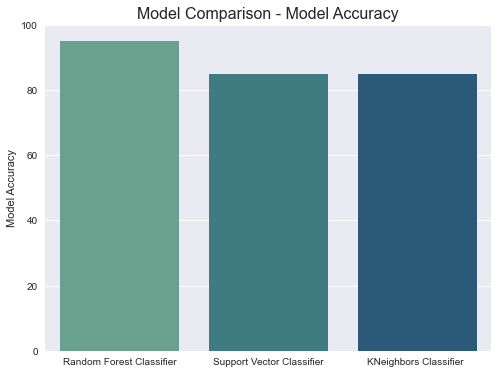

In [83]:
plt.style.use("seaborn")

x2 = ["Random Forest Classifier",  
     "Support Vector Classifier","KNeighbors Classifier "]

y2 = [RFTaccuracy*100, 
     SVCTaccuracy*100,
     KNNTaccuracy*100,]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x2,y=y2, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))

In [84]:
from joblib import dump

dump(rf_evalutaed, './Liver_cancer_RF.joblib')
Y_test=Y_test.replace({0: 'Normal', 1: 'Tumoral'})
pd.DataFrame(Y_test).to_csv('Liver_result',)
pd.DataFrame(X_test_selected).to_csv('Liver_test',)


In [57]:
from genetic_selection import GeneticSelectionCV

selectors = GeneticSelectionCV(svc_evalutaed,
                               cv=kfold,
                               verbose=0,
                               scoring='accuracy',
                               n_population=10,
                               crossover_proba=0.60,
                               mutation_proba=0.2,
                               n_generations=50,
                               crossover_independent_proba=0.6,
                               mutation_independent_proba=0.06,
                               tournament_size=8,
                               caching=True,
                               n_jobs=4)
selectors = selectors.fit(X_train, Y_train)


In [58]:
print('Feature Selection:', X_train.columns[selectors.support_])

Feature Selection: Int64Index([   1,    4,    6,    7,    9,   12,   13,   15,   16,   17,
            ...
            1981, 1982, 1984, 1986, 1987, 1989, 1992, 1994, 1996, 1997],
           dtype='int64', length=868)


In [59]:
selectors.score(X_train, Y_train) #Train Score

0.9761904761904762

In [60]:
selectors.score(X_test, Y_test) #Test Score

0.85

In [61]:
from sklearn.metrics import classification_report
y_pred=selectors.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 5  0]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.80      0.89        15

    accuracy                           0.85        20
   macro avg       0.81      0.90      0.83        20
weighted avg       0.91      0.85      0.86        20



In [62]:
from genetic_selection import GeneticSelectionCV

selectors = GeneticSelectionCV(knn_evalutae,
                               cv=kfold,
                               verbose=0,
                               scoring='accuracy',
                               n_population=10,
                               crossover_proba=0.60,
                               mutation_proba=0.2,
                               n_generations=50,
                               crossover_independent_proba=0.6,
                               mutation_independent_proba=0.06,
                               tournament_size=8,
                               caching=True,
                               n_jobs=4)
selectors = selectors.fit(X_train, Y_train)

In [63]:
print('Feature Selection:', X_train.columns[selectors.support_])

Feature Selection: Int64Index([   0,    1,    8,    9,   11,   12,   13,   15,   16,   17,
            ...
            1981, 1983, 1986, 1989, 1991, 1992, 1993, 1994, 1995, 1999],
           dtype='int64', length=821)


In [64]:
selectors.score(X_train, Y_train) #Train Score

0.8809523809523809

In [65]:
selectors.score(X_test, Y_test) #Test Score

0.95

In [66]:
from sklearn.metrics import classification_report
y_pred=selectors.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 4  1]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        15

    accuracy                           0.95        20
   macro avg       0.97      0.90      0.93        20
weighted avg       0.95      0.95      0.95        20

